# Предобработка данных

In [1]:
#Подключаем бибиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
from scipy import stats as st

In [2]:
# Устанавливаем максимальную ширину столбца 
pd.set_option('display.max_colwidth', None)

In [3]:
#Открыли дата сеты
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
    

In [4]:
#Смотрим сколько строк, столбцов и типы данных
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Смотрим первые 5 строк hypothesis
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
# Привели столбцы в общему виду нижнего регистра 
hypothesis = hypothesis.rename(str.lower, axis='columns')
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [7]:
#Смотрим сколько строк, столбцов и типы данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# Смотрим первые 5 строк orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# Привели столбцы в общему виду нижнего регистра 
orders = orders.rename(str.lower, axis='columns')
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
#Смотрим сколько строк, столбцов и типы данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#Смена типа данных даты с object на datetime64
orders['date'] = orders['date'].astype('datetime64')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
#Смена типа данных даты с object на datetime64
visitors['date'] = visitors['date'].astype('datetime64')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
#Проверяем на явные дубликаты
display(
    hypothesis.duplicated().isna().sum(), 
    orders.duplicated().isna().sum(), 
    visitors.duplicated().isna().sum()
)


0

0

0

## Вывод

Изучили три датафрейма hypothesis, orders, visitors.

Привели к общему регистру столбцы в датафрейме hypothesis и orders.

Измнили тип данных в столбцах "data" в датафреймах orders и visitors с odject на datetime.

Проверили на наличия явных дубликатов, не обнаружено.

Ошибок больше не выявлено. будем приступать к дальнейшему решению поставленной задачи. 

In [15]:
#Составили группу А с уникальными пользователями
sample_A_all = orders[orders['group'] == 'A']
sample_A = sample_A_all['visitorid'].unique()

In [16]:
#Составили группу B с уникальными пользователями
sample_B_all = orders[orders['group'] == 'B']
sample_B = sample_B_all['visitorid'].unique()

In [3]:
set_a = set(sample_A)
set_b = set(sample_B)

# Найдем пересечение в группе A и B 
users_ab = set_a.intersection(set_b)
display(len(users_ab))
list(users_ab)

NameError: name 'sample_A' is not defined

In [18]:
#Посмотрели что пользовали из списка покупали на какую сумму и когда 
display(orders.query('visitorid in @users_ab').sort_values(by='revenue', ascending=False).head(10))
len(orders.query('visitorid in @users_ab'))

,transactionid,visitorid,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B
1029,469609643,2378935119,2019-08-10,58220,A
873,2519737434,4256040402,2019-08-08,58220,B
60,1421016313,4256040402,2019-08-16,56650,B
627,4212256267,4120364173,2019-08-29,39800,A
254,1545495643,2686716486,2019-08-23,34340,B
1096,3075787818,3062433592,2019-08-12,32610,B
1189,4082620617,393266494,2019-08-14,31550,B


181

## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

In [19]:
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [20]:
# посчитали рейтинг ice_score 
hypothesis['ice_score'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice_score', ascending=False).round(2).head(5)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


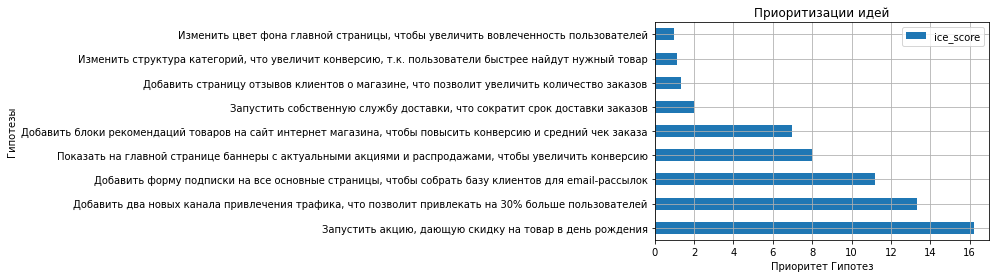

In [21]:
#Сводная таблица для графика
pivot_hypothesi = (
    hypothesis.pivot_table(index='hypothesis', values='ice_score')
    .sort_values(by='ice_score', ascending=False)
    .plot(grid=True, kind='barh')
)

# Добавляем заголовок и метки осей
plt.title('Приоритизации идей')
plt.xlabel('Приоритет Гипотез')
plt.ylabel('Гипотезы')
# Отображаем график
plt.show()

## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [22]:
#Считаем rice_score
hypothesis['rice_score'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.head().sort_values(by='rice_score', ascending=False).round(3)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


In [23]:
#Сводная таблица ICE и RICE
(hypothesis.pivot_table(index='hypothesis', values=['ice_score', 'rice_score'])
.sort_values(by='ice_score',ascending=False).head())

,ice_score,rice_score
hypothesis,,
"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0


### Вывод

Взяв топ5 категорий ICE и RICE мы видим, что у них меняется позиция, RICE учитывает повышение конверсии + количество людей.
ICE учитывает только увеличение конверсии.
Поэтому одни и теже гипотезы занимают разные позиции c учетом охвата пользователей и без учета. 
Одна гипотеза показывает одинаковый ICE И RICE 'Запустить акцию, дающую скидку на товар в день рождения'.

# Анализ A/B-теста

## Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [24]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
#Агрегированные кумулятивные по дням данные о заказах
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated.head(10)

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [26]:
#Агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
    visitors['group'] == x['group'])].
    agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [27]:
# Кумулятивная выручка по группам
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


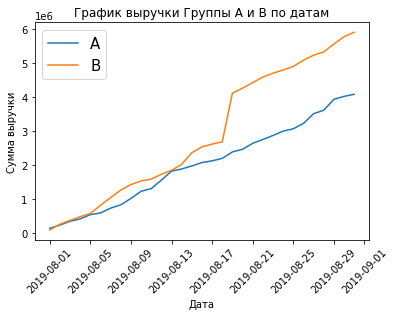

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(fontsize=15)
plt.xticks(rotation=45)
plt.title('График выручки Группы А и B по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма выручки')
plt.show()

C 2019-08-17 по 2019-08-18 - сумма заказов группы А не сильно отличается от группы B.

с 2019-08-19 по 2019-08-21  - сумма заказов группы А от группы B очень сильно падает. 

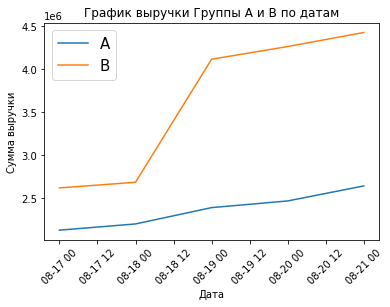

In [29]:
#Создали срез с учетом дат где проишел рост 
cumulativeRevenueA_ = (cumulativeRevenueA[(cumulativeRevenueA['date'] >= '2019-08-17') 
                                          &  (cumulativeRevenueA['date'] <= '2019-08-21')])
#Создали срез с учетом дат где проишел рост                        
cumulativeRevenueB_= (cumulativeRevenueB[(cumulativeRevenueB['date'] >= '2019-08-17') 
                                          &  (cumulativeRevenueB['date'] <= '2019-08-21')])

# Строим график выручки группы А
plt.plot(cumulativeRevenueA_['date'], cumulativeRevenueA_['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB_['date'], cumulativeRevenueB_['revenue'], label='B')

plt.legend(fontsize=15)
plt.xticks(rotation=45)
plt.title('График выручки Группы А и B по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма выручки')
plt.show()

In [30]:
display(cumulativeRevenueA_.head())
cumulativeRevenueB_.head()

,date,revenue,orders
32,2019-08-17,2129769,311
34,2019-08-18,2202167,328
36,2019-08-19,2391910,350
38,2019-08-20,2469529,362
40,2019-08-21,2643838,385


,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


На данном отрезке графика видно на сколько сильно случился рост показателей группы B от группы А

### Вывод

Рост группы А линейный.

Рост группы B до даты 2019-08-17 тоже линейный.

После этой даты идет резкий всплекск, возможно были очень дорогие заказы



##  Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

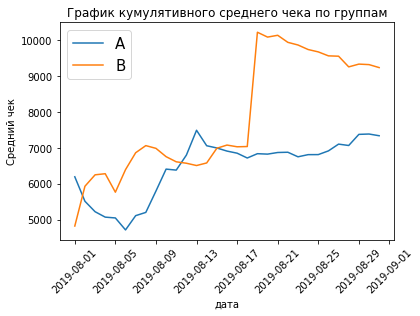

In [31]:
#Uрафик кумулятивного среднего чека по группам#
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(fontsize=15)
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('Средний чек')
plt.show()

### Вывод

Група B имеет не самый удачный старт по среднему чеку, но каждый день его увеличивает, на графике видно хорошо рост с последующей корректировкой. После 2019-08-17 идет резкий рост среднего чека. Что говорит нам о крупных покупках. С последующей корректировкой. 

Группа А наоборот имет удачный старт по сумме среднего чека, но теряет сумму среднего чека до 2019-08-06, после происходит рост и выход на плато среднего чека с даты 2019-08-13. 

## Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

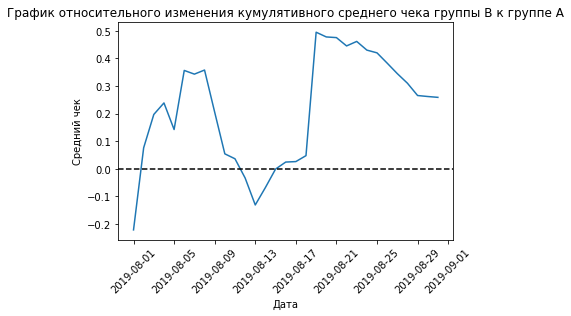

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

### Вывод

График похож на американскте горки, можем сказать точно. Это крупные заказа, которые создают такие выбросы. 

## Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

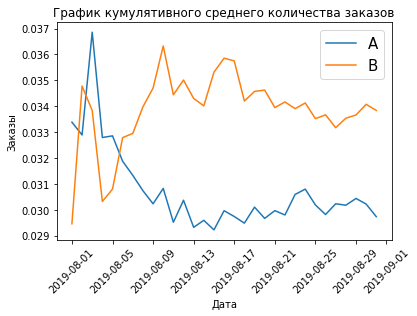

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(fontsize=15)
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.show()

### Вывод

Группа Б и А в начале имеют высокую волатильность.
Конверсия группы Б показываает рост в отличии от группы А.

## Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

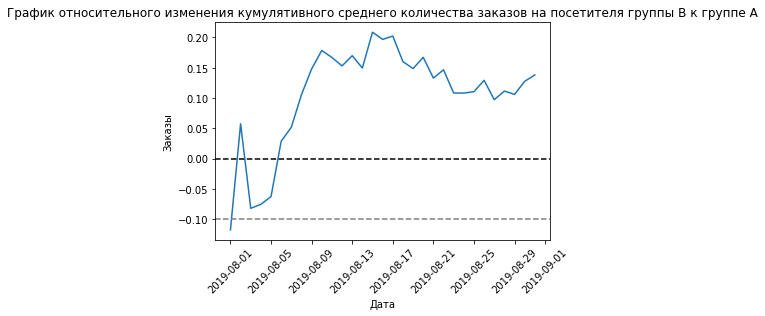

In [34]:
#график относительного изменения кумулятивного среднего количества заказов на посетителя
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']]
                                      ,left_on='date', right_on='date'
                                      ,how='left',suffixes=['A', 'B'])
              )
(plt.plot(mergedCumulativeConversions['date'],
          mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
          label="Относительный прирост конверсии группы B относительно группы A"))
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Заказы')
plt.show()


### Вывод

Количество средних заказов группы B было низкое в начале. Последующий огромный рост средних заказов относительно группы А, но мы знаем что у нас есть выбросы в группе B.

## Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

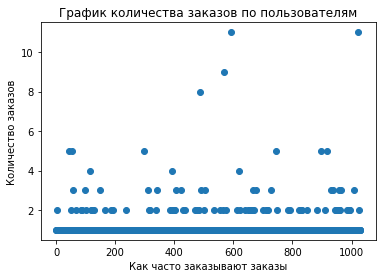

In [35]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'transactionid']

ordersByUsers.sort_values(by='transactionid', ascending=False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
y_values = ordersByUsers['transactionid']
plt.scatter(x = x_values, y = y_values )
plt.title('График количества заказов по пользователям')
plt.xlabel('Как часто заказывают заказы')
plt.ylabel('Количество заказов')
plt.show()

### Вывод

Можем сделать вывод, один пользователь делает один заказ.
Не так часто пользователь делает 2 заказа.
Есть пользователи которые делают от 3 до 5 заказов. 
И есть пользователи супер шопоголики они делают от 8 до 11 заказов(в данном случае это выбросы для нас)


##  Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [36]:
#Считаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['transactionid'], [95, 99])

array([2., 4.])

### Вывод

5% пользователей заказывают 2 заказа.
1% пользователей заказывает 4 заказа. Можем сказать что 4 заказа это выбросы.

##   Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [37]:
#Посмотирм максимальное значяение
orders_fix = (orders['revenue'])
orders_fix.max()

1294500

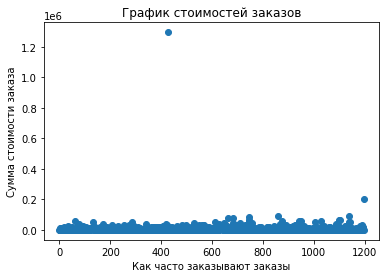

In [38]:
#Строим точечный график стоимости заказов 
x_values = pd.Series(range(0, len(orders_fix)))
plt.scatter(x=x_values, y=orders_fix)
plt.title('График стоимостей заказов')
plt.xlabel('Как часто заказывают заказы')
plt.ylabel('Сумма стоимости заказа')
plt.show()

In [39]:
#Удалили самый большой заказ
orders_fix_nonmax = orders_fix.drop(orders_fix[orders_fix == orders_fix.max()].index)

In [40]:
#Проверили что работает
orders_fix_nonmax.max()

202740

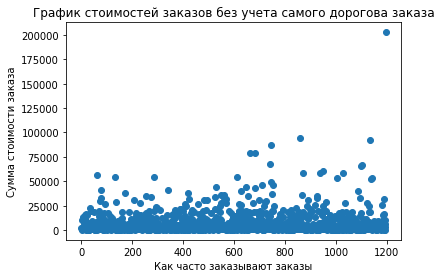

In [41]:
#Строим точечный график без самого большого заказа
x_values = pd.Series(range(0, len(orders_fix_nonmax)))
plt.scatter(x=x_values, y=orders_fix_nonmax)
plt.title('График стоимостей заказов без учета самого дорогова заказа')
plt.xlabel('Как часто заказывают заказы')
plt.ylabel('Сумма стоимости заказа')
plt.show()

Такой вариант графика более наглядный для понимание, что происходит. 

In [42]:
#Самый минимальный заказ
orders_fix_nonmax.min()

50

### Вывод 

Построили график без самого большого заказа, такой вариант нам показывает,что много заказов от 50 рублей до 20.000 тысяч.

## Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [43]:
#Считаем 95-й и 99-й перцентили количества заказов на пользователя
np.percentile(orders_fix, [95, 99])

array([28000. , 58233.2])

### Вывод

5% заказов было сделано больше 28.000 тысяч и 1 процент заказов составили 58.233 тысячи рублей.
Будем считать все что вышел 1% выбросами.

## Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    

Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы.

Увидели выбросы и нашли границу для их определения.


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между
группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

  H0 - различий в конверсии между группами нет 
  
  H1 - различия в конверсии между между группами есть

In [44]:
# Считаем статистическую значимость различий в среднем числе заказов 
# на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Напомним названия столбцов данных:

    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [45]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactionid']

In [46]:
# Cоздадим sampleA и sampleB, в которых пользователям из разных групп будет соответствовать
# количество заказов.
sampleA = (pd.concat([ordersByUsersA['transactionid']
                      ,pd.Series(0, index=np.arange(data['visitorsPerDateA']
                       .sum() - len(ordersByUsersA['transactionid']))
                                 , name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['transactionid']
                      ,pd.Series(0, index=np.arange(data['visitorsPerDateB']
                       .sum() - len(ordersByUsersB['transactionid']))
                                 ,name='orders')],axis=0))

Задаем уровень значимости alpha=0.05

Применим критерий Манна-Уитни

In [47]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactionid']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост группы В к группе А',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value 0.017
Относительный прирост группы В к группе А 0.138


### Вывод

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.


Задаем уровень значимости alpha=0.05

H0 - различий в среднем чеке в группах нет

H1 - различий в среднем  чеке между группами есть 

In [48]:
# Cчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
(print('p-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue']
                                           , orders[orders['group']=='B']['revenue'])[1])))
(print('Относительны прирост группы B к группе А','{0:.3f}'
       .format(orders[orders['group']=='B']['revenue']
       .mean()/orders[orders['group']=='A']['revenue'].mean()-1)))

p-value 0.729
Относительны прирост группы B к группе А 0.259


### Вывод 

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.
Относительный прирост В к А: 25.9%

## Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.


In [49]:
# Посчитали аномальный пользователей
cost_orders = np.percentile(orders_fix, 99)
many_orders = np.percentile(ordersByUsers['transactionid'], 99)
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionid'] > many_orders]['visitorid'],
        ordersByUsersB[ordersByUsersB['transactionid'] > many_orders]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > cost_orders]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorid, dtype: int64

15

In [50]:
#Считаем статистическую значимость различий в среднем количестве 
#заказов на посетителя между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [51]:
print('P-value','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B к группе А','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.014
Относительный прирост группы B к группе А 0.153


## Вывод

Наша гипотеза по очищенынм данным:
H0 - различий в конверсии между группами нет 
  
H1 - различия в конверсии между между группами есть

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.3%
 


## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


In [52]:
#Считаем татистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
print('p-value','{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительны прирост группы B к группе А'
    ,"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.851
Относительны прирост группы B к группе А -0.006


### Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.
Относительный прирост В к А: 0.6%

## Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### Общий вывод

Приоритизация гипотез

Выяснили на какие гипотезы стоит обратить в первую очередь:
- Запустить акцию, дающую скидку на товар в день рождения.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей .
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Гипотезы с учетом охвата пользователи:
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

Анализ теста A/B

- Конвeрсия группы B выше чем в группе А по сырым данным составляет 13.808%, а по очищенным данным  15.3%

- Нет достоверных различий в среднем чеке между двумя группами A и B ни на основе исходных данных, ни на основе данных после удаления аномалий.  Средний чек группы B в сырых данных выше группы А на  25.9%, а на основании очищенных данных составляет всего 0.6%


На основании полученных данных победила группа B, ее конверсия выше чем у группы А. Тест останавливаем.